# Convolutional Neural Network and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visiual data. Such as the camera of a self-driving car recognizing the car in front

## Get the Data

<a href="https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip">Food101 Dataset(Modified only pizza and steak)</a>

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-06-10 17:24:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 108.177.120.128, 142.250.159.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  71.7MB/s    in 1.5s    

2023-06-10 17:24:43 (71.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data 

In [2]:
import os

# Walk through pizza_steak/train and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [3]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    print(f"Image shape: {img.shape}")
    plt.imshow(img)
    return img

Image shape: (512, 512, 3)


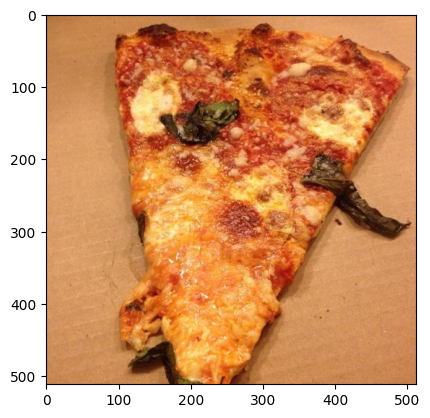

In [5]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [6]:
img/255

array([[[0.68235294, 0.44313725, 0.22745098],
        [0.6745098 , 0.43529412, 0.21960784],
        [0.6627451 , 0.42352941, 0.20784314],
        ...,
        [0.89411765, 0.63137255, 0.41568627],
        [0.88627451, 0.62352941, 0.40784314],
        [0.88235294, 0.61960784, 0.40392157]],

       [[0.67843137, 0.43921569, 0.22352941],
        [0.67058824, 0.43137255, 0.21568627],
        [0.66666667, 0.42745098, 0.21176471],
        ...,
        [0.89019608, 0.62745098, 0.41176471],
        [0.88627451, 0.62352941, 0.40784314],
        [0.88235294, 0.61960784, 0.40392157]],

       [[0.6745098 , 0.43529412, 0.21960784],
        [0.67058824, 0.43137255, 0.21568627],
        [0.66666667, 0.42745098, 0.21176471],
        ...,
        [0.88627451, 0.62352941, 0.40784314],
        [0.88235294, 0.61960784, 0.40392157],
        [0.88235294, 0.61960784, 0.40392157]],

       ...,

       [[0.75686275, 0.50980392, 0.30980392],
        [0.77254902, 0.5254902 , 0.3254902 ],
        [0.78431373, 0

## An end-to-end example

Let's build a convolutional neural network to find our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir  = "pizza_steak/test"

# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                            activation="relu",
                            input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, 
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))
                        


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 247ms/step - loss: 0.5655 - accuracy: 0.7147 - val_loss: 0.4140 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4741 - accuracy: 0.7713 - val_loss: 0.4369 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4483 - accuracy: 0.7927 - val_loss: 0.3990 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 13s 279ms/step - loss: 0.4107 - accuracy: 0.8180 - val_loss: 0.3799 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3459 - accuracy: 0.8653 - val_loss: 0.4482 - val_accuracy: 0.8060


> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch make sure you're using a GPU 

In [4]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [5]:
tf.random.set_seed(42)

# Create a model to replicate

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics="accuracy")

# Fit the model

model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 261ms/step - loss: 0.6945 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
